In [1]:
import pandas as pd
from scipy.stats import spearmanr
from scipy.stats import kendalltau
%matplotlib inline

In [2]:
data_311 = pd.read_csv('311_zillow.csv')
flickr = pd.read_csv('cleaned_flickr.csv',index_col=0)
nypd = pd.read_csv('cleaned_nypd_zillow_year.csv',index_col=0)

In [3]:
data_311.head()

,name,cnt
0,Williamsburg,8441
1,Lower East Side,6409
2,Bedford Stuyvesant,5869
3,Sunset Park,5311
4,Bushwick,4616


In [4]:
data_311_groupby = data_311.groupby('name',as_index=False).sum()

In [5]:
nypd_groupby = nypd.groupby('name',as_index=False).sum()[['name','arrests']]

In [6]:
nypd_groupby.shape,flickr.shape,data_311_groupby.shape

((258, 2), (110, 2), (253, 2))

In [7]:
merged = pd.merge(nypd_groupby,pd.merge(flickr,data_311_groupby,how='outer'),how='inner')

In [8]:
merged.fillna(0,inplace=True)

In [9]:
merged.rename({'cnt':'complaints'},axis=1,inplace=True)

In [10]:
merged.head()

,name,arrests,flickr,complaints
0,Annadale,492,0.0,26.0
1,Arden Heights,1084,0.0,37.0
2,Arrochar,2089,1.0,123.0
3,Arverne,4946,0.0,16.0
4,Astoria,44770,336.0,3851.0


### Calculate score

In [11]:
merged_score = pd.merge(flickr,data_311_groupby,how='outer')

In [12]:
merged_score.fillna(0,inplace=True)

In [13]:
merged_score.rename({'cnt':'complaints'},axis=1,inplace=True)

In [14]:
merged_score.head()

,name,flickr,complaints
0,East New York,7.0,3984.0
1,East Harlem,51.0,1605.0
2,Bedford Stuyvesant,29.0,5869.0
3,Harlem,38.0,2180.0
4,South Bronx,8.0,2246.0


In [15]:
merged_score['flickr_norm'] =  (merged_score.loc[:,'flickr'] - merged_score.loc[:,'flickr'].min())/\
                                    (merged_score.loc[:,'flickr'].max()-merged_score.loc[:,'flickr'].min())
merged_score['comp_norm'] = (merged_score.loc[:,'complaints'] - merged_score.loc[:,'complaints'].min())/\
                                    (merged_score.loc[:,'complaints'].max()-merged_score.loc[:,'complaints'].min())

In [16]:
merged_score.head()

,name,flickr,complaints,flickr_norm,comp_norm
0,East New York,7.0,3984.0,0.002185,0.471982
1,East Harlem,51.0,1605.0,0.015918,0.190143
2,Bedford Stuyvesant,29.0,5869.0,0.009051,0.695297
3,Harlem,38.0,2180.0,0.011860,0.258263
4,South Bronx,8.0,2246.0,0.002497,0.266082


In [17]:
merged_score['score'] = (merged_score['flickr_norm'] - merged_score['comp_norm'])

In [18]:
merged_score = merged_score.merge(nypd_groupby)

In [21]:
merged_score.score.max(),merged_score.score.min()

(0.4531453619239426, -0.6862455797685661)

In [19]:
merged_score.sort_values('arrests',ascending=True)[50:90]

,name,flickr,complaints,flickr_norm,comp_norm,score,arrests
99,Elm Park,1.0,42.0,0.000312,0.004976,-0.004664,668
161,Georgetown,0.0,9.0,0.000000,0.001066,-0.001066,684
102,Bronx Park,1.0,14.0,0.000312,0.001659,-0.001346,687
101,Columbia Street Waterfront District,1.0,138.0,0.000312,0.016349,-0.016037,739
220,Richmond Valley,0.0,12.0,0.000000,0.001422,-0.001422,747
154,Floral park,0.0,139.0,0.000000,0.016467,-0.016467,760
231,Spuyten Duyvil,0.0,152.0,0.000000,0.018007,-0.018007,773
199,New Springville,0.0,28.0,0.000000,0.003317,-0.003317,787
249,Windsor Terrace,0.0,163.0,0.000000,0.019311,-0.019311,804
170,Grymes Hill,0.0,37.0,0.000000,0.004383,-0.004383,806


In [82]:
merged_score[merged_score.name == 'Little Italy']

,name,flickr,complaints,flickr_norm,comp_norm,score,arrests
94,Little Italy,643.0,1160.0,0.200687,0.137424,0.063262,2295


In [86]:
merged_score[merged_score.name == 'DUMBO']

,name,flickr,complaints,flickr_norm,comp_norm,score,arrests
96,DUMBO,77.0,89.0,0.024032,0.010544,0.013489,1176


In [73]:
merged_score[merged_score.name == 'East New York']

,name,flickr,complaints,flickr_norm,comp_norm,score,arrests
0,East New York,7.0,3984.0,0.002185,0.471982,-0.469797,112139


In [74]:
merged_score[merged_score.name == 'Bedford Stuyvesant']

,name,flickr,complaints,flickr_norm,comp_norm,score,arrests
2,Bedford Stuyvesant,29.0,5869.0,0.009051,0.695297,-0.686246,104515


In [35]:
merged_score.shape

(108, 5)

In [90]:
spearmanr(merged_score.arrests,merged_score.score)

SpearmanrResult(correlation=-0.6800935152039003, pvalue=7.783848472015184e-36)

In [92]:
kendalltau(merged_score.arrests,merged_score.score)

KendalltauResult(correlation=-0.5295794925273626, pvalue=3.294554165073828e-36)

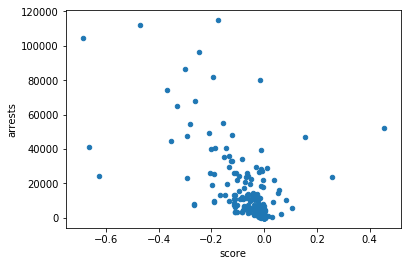

In [24]:
merged_score.plot.scatter('score','arrests')

In [22]:
merged_score_selected = merged_score[['name','score']]

In [23]:
merged_score_selected.to_csv('name_and_score.csv',index=False)